In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Generates and saves a histogram visualization comparing score distributions across Hogwarts houses
for each course. The visualization helps identify which courses have homogeneous or heterogeneous
distributions among houses.

The function:
- Reads preprocessed data from CSV
- Creates a 4x3 subplot grid for 12 courses
- Generates overlapping histograms for each house in each course
- Uses different colors for each house
- Saves the resulting visualization as a PNG file

Analysis shows that:
1. Care of Magical Creatures has the most homogeneous distribution
2. Some courses like Potions show clear differences between houses
3. Arithmancy shows slight variations but maintains general uniformity

The output is saved as 'histogram.png' in the output folder.

In [4]:
# Establecemos la ruta y leemos el archivo convirtiéndolo en un DataFrame
file_train = '../datasets/dataset_train.csv'
df_train = pd.read_csv(file_train, index_col=0)

In [5]:
# Get list of course columns (excluding non-course columns)
courses = df_train.select_dtypes(include=['float64']).columns
courses

Index(['Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object')

In [6]:
import json
import sys
sys.path.append('..')

# Leer el archivo JSON
with open('../output/colum_to_drop.json', 'r') as file:
    data = json.load(file)
    
# Obtener la columna a eliminar
column_to_drop = data['column_to_drop']

# Eliminar la columna del Index
courses = courses.drop(column_to_drop)
courses

Index(['Arithmancy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object')

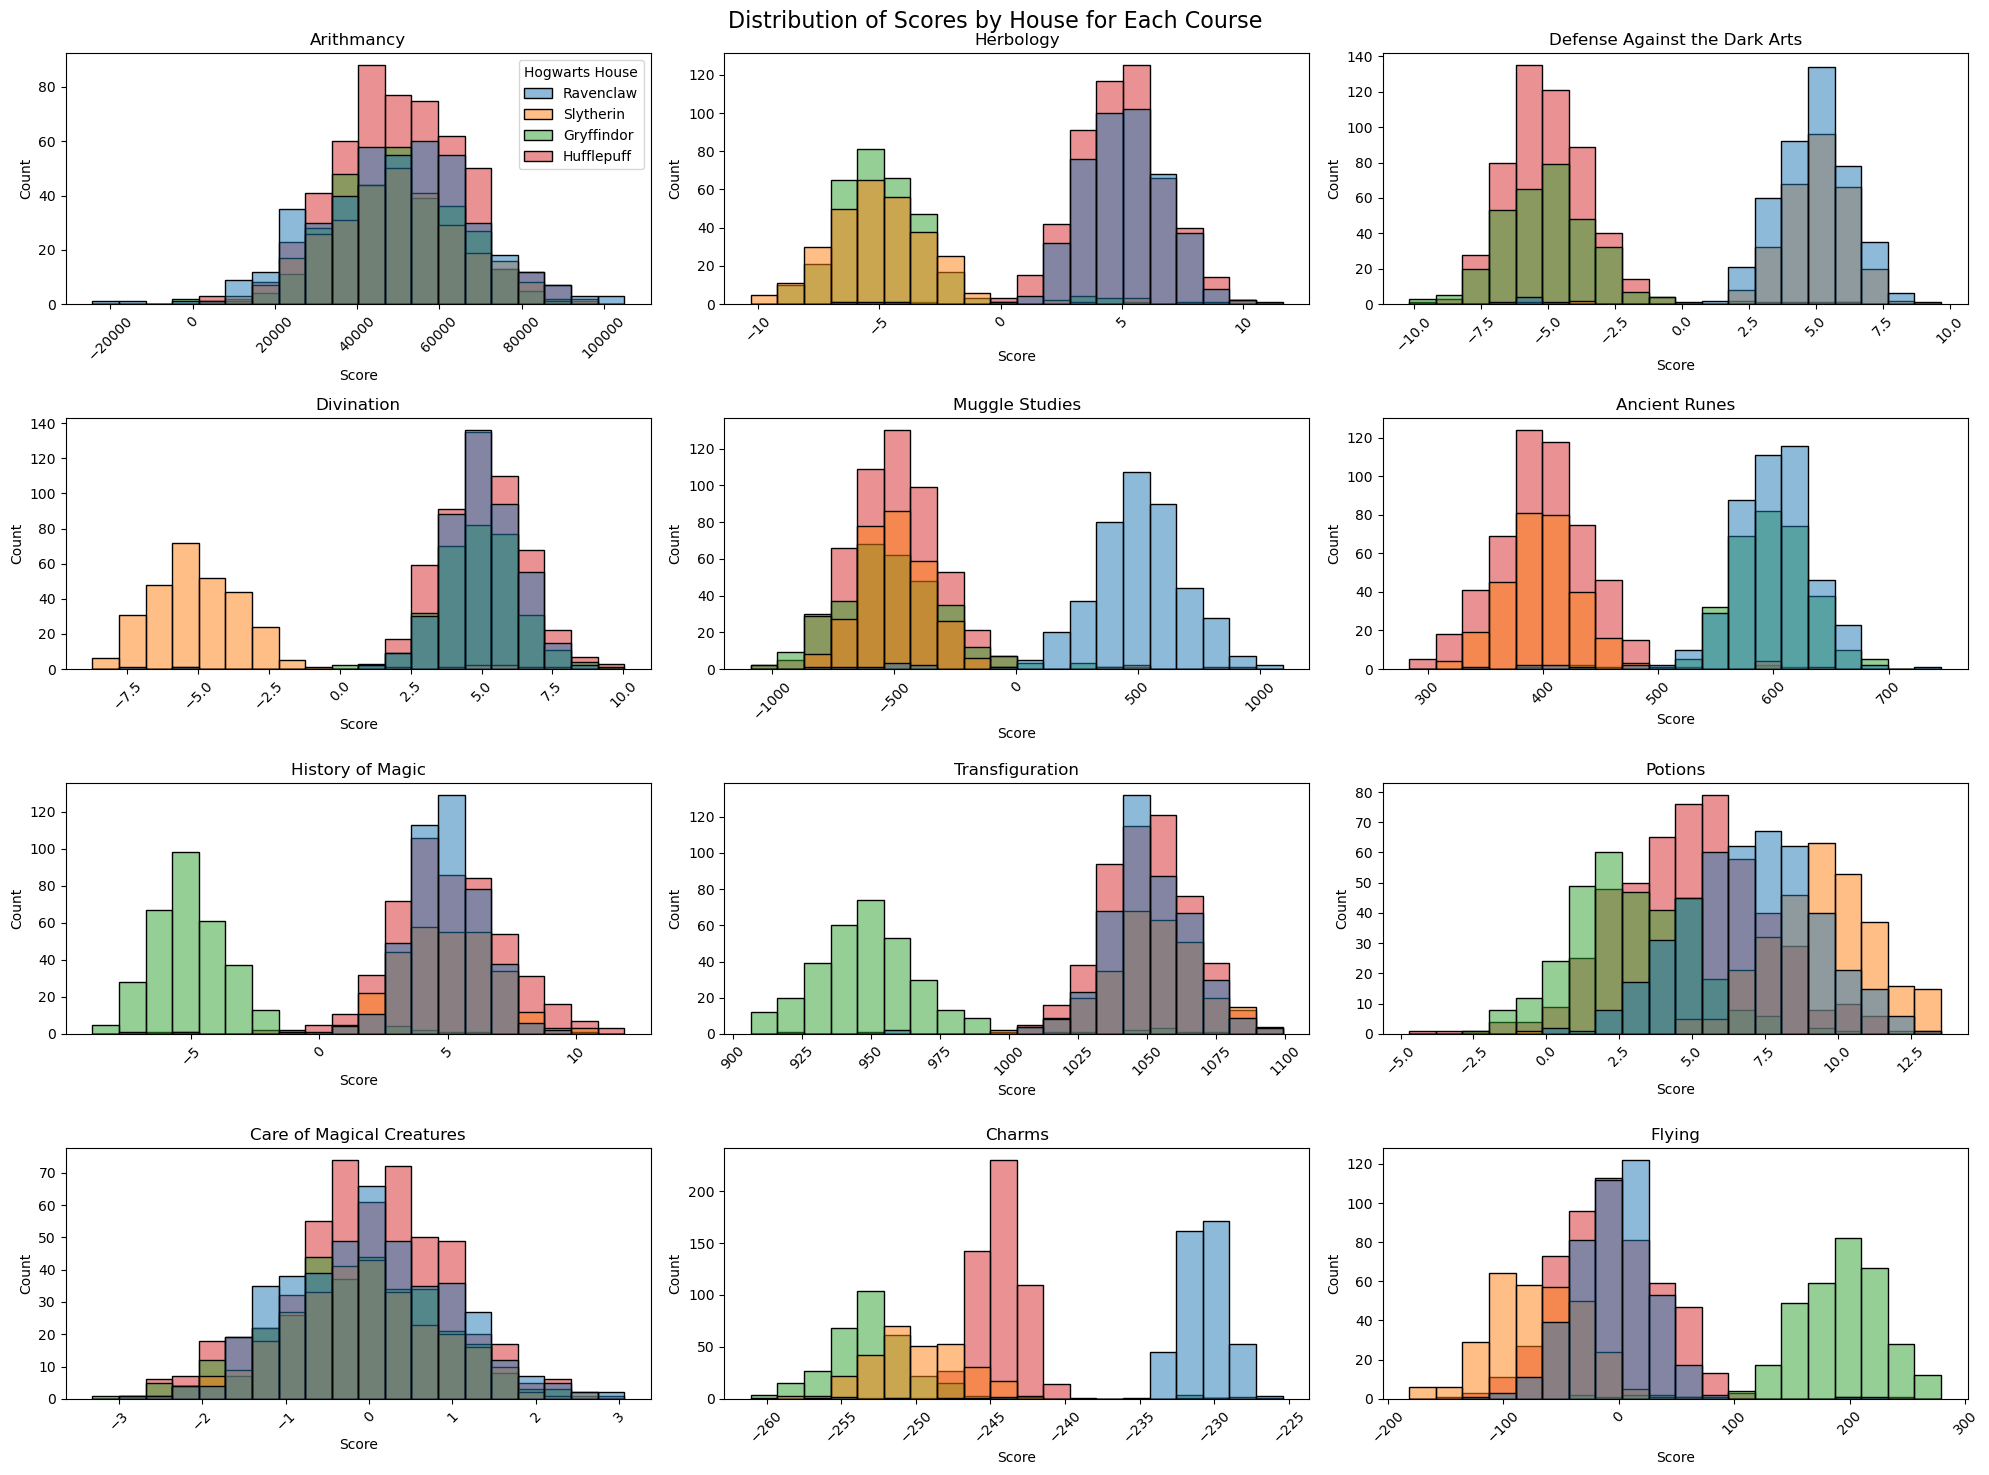


The histogram graph has been saved in the 'output' folder.


In [7]:
# Create a figure with subplots for each course
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Distribution of Scores by House for Each Course', fontsize=16)

# Create a subplot for each course
for idx, course in enumerate(courses, 1):
    plt.subplot(4, 3, idx)
    
    # Create histogram for current course
    sns.histplot(data=df_train, x=course, hue='Hogwarts House', 
                bins=20, alpha=0.5, multiple="layer")
    
    plt.title(course)
    plt.xlabel('Score')
    plt.ylabel('Count')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Only show legend for the first subplot to avoid redundancy
    if idx != 1:
        plt.legend([],[], frameon=False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('../output/histogram.png')
plt.show()
plt.close()

print("\nThe histogram graph has been saved in the 'output' folder.")

## Question: Which Hogwarts course has a homogeneous score distribution between all four houses?

Answer to the question:

We can discard bimodal histograms and focus on the following three options:

1. **`Arithmancy`**
- Shows considerably overlapped distribution
- However, `Hufflepuff` (red) shows a slight tendency towards higher scores
- `Ravenclaw` (blue) has slightly lower concentration at the central peak

2. **`Potions`**
- Although there is overlap, the distributions are quite dispersed
- Clear differences can be seen between houses
- `Slytherin` (green) tends to have higher scores
- Distributions are wider and less uniform between houses

3. **`Care of Magical Creatures`**
- Shows the most uniform overlap of the three
- Peaks for all houses are practically at the same point
- Distribution shapes are very similar for all houses
- Dispersion (distribution width) is very similar for all houses
- It's difficult to distinguish significant differences between houses

**Final Result**
- The most uniform distribution is **`Care of Magical Creatures`**
- This course shows the most balanced and similar distribution across all houses, with very similar scoring patterns regardless of student house affiliation